Loading libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from IPython.display import display
import random


from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve

Loading the data from CSV

In [2]:
df = pd.read_csv("data_week4_1.csv", names=["x1", "x2", "y"], header=None, comment='#')
display(df.head())
x1 = df.iloc[:,0]
x2 = df.iloc[:,1]
x = np.column_stack((x1, x2))
y = df.iloc[:,2]

,x1,x2,y
0,-0.89,0.81,-1
1,0.33,0.98,-1
2,0.23,0.02,1
3,0.73,-0.66,1
4,-0.41,0.81,-1


Scatterplot of the data

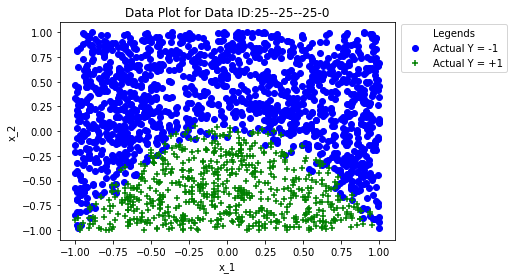

In [3]:
plot.scatter(x1[y == -1], x2[y == -1], color='blue', marker="o")
plot.scatter(x1[y == 1], x2[y == 1], color='green', marker="+")
plot.title('Data Plot for Data ID:25--25--25-0')
plot.xlabel("x_1")
plot.ylabel("x_2")
plot.legend(['Actual Y = -1', 'Actual Y = +1'], loc = 'lower right', bbox_to_anchor=(1.35, 0.75), title="Legends")
plot.show()

In [4]:
y_postive = np.count_nonzero(y == 1)
y_negative = np.count_nonzero(y == -1)

actual_df = pd.DataFrame({"Actual Positive":[y_postive], "Actual Negative":[y_negative]})
display(actual_df)

,Actual Positive,Actual Negative
0,635,1353


## Using 5-Fold Cross Validation to select Polynomial Degree to be added to Data Set - 1

In [5]:
poly_degree_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
penalty_parameter_range = [0.001, 1, 10, 1000]

Function that takes range of C as input and use 5-fold cross validation and returns mean accuracy and standard deviation for Logistic Regression. This method is used to find optimal degree that is to be added in data for LR

In [6]:
def calculate_accuracy_stddev_for_given_penalty(penalty_parameter) :
    k_fold_split = 5

    k_fold_split_function =  KFold(n_splits = k_fold_split)

    accuracy_poly_degree = []
    standard_deviation_poly_degree = []
    Logistic_Regression_Model = LogisticRegression(penalty = 'l2', C = penalty_parameter, max_iter = 10000)
    
    for poly_degree in poly_degree_range : 
        poly_features_function = PolynomialFeatures(poly_degree)
        x_poly_features  = poly_features_function.fit_transform(x)
        accuaracy_fold = []
        for train_data_index, test_data_index in k_fold_split_function.split(x_poly_features):
            Logistic_Regression_Model.fit(x_poly_features[train_data_index], y[train_data_index])
            predictions = Logistic_Regression_Model.predict(x_poly_features[test_data_index])
            accuaracy_fold.append(accuracy_score(y[test_data_index], predictions))
            
        accuracy_poly_degree.append(np.array(accuaracy_fold).mean())
        standard_deviation_poly_degree.append(np.array(accuaracy_fold).std())
        
    return accuracy_poly_degree, standard_deviation_poly_degree

Evaluating optimal value of Degree by plotting Accuracy plots for range of degrees

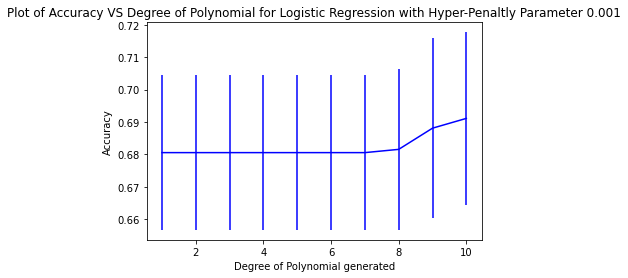

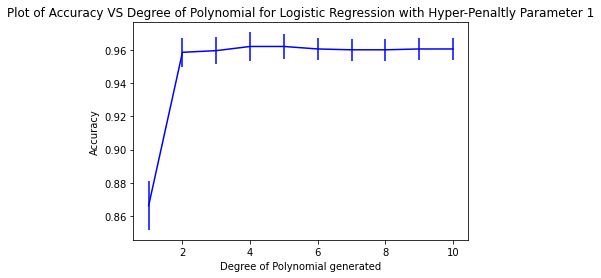

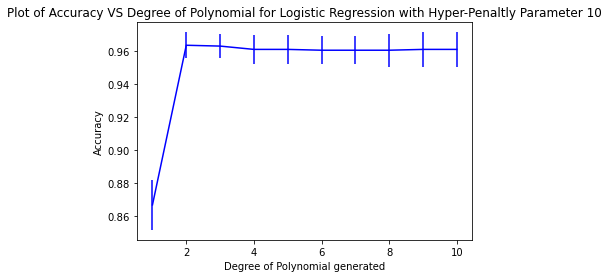

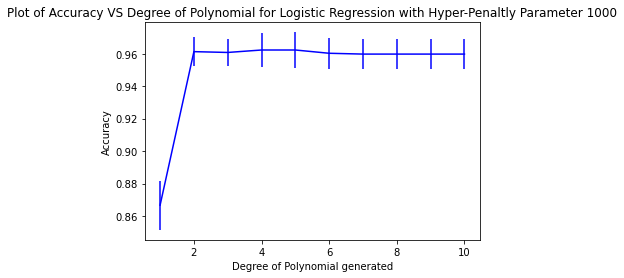

In [7]:
for penalty_parameter in penalty_parameter_range : 
    
    accuracy_poly_degree, standard_deviation_poly_degree = calculate_accuracy_stddev_for_given_penalty(penalty_parameter)
    plot.figure()
    plot.errorbar(poly_degree_range, accuracy_poly_degree, yerr = standard_deviation_poly_degree, color = 'blue')
    plot.xlabel('Degree of Polynomial generated')
    plot.ylabel('Accuracy')
    plot.title('Plot of Accuracy VS Degree of Polynomial for Logistic Regression with Hyper-Penaltly Parameter {}'.format(penalty_parameter))
    plot.show()

## Using 5-Fold Cross Validation to select Penalty Parameter C

Function that takes range of C as input and degree and use 5-fold cross validation and returns mean accuracy and standard deviation for Logistic Regression. This method is used to find optimal C for LR

In [8]:

def calculate_accuracy_stddev_for_penalty_ranges(penalty_parameter_ranges, poly_degree) :
    
    k_fold_split = 5

    k_fold_split_function =  KFold(n_splits = k_fold_split)

    accuracy_penalty = []
    standard_deviation_penalty = []
    
    poly_features_function = PolynomialFeatures(poly_degree)
    x_poly_features  = poly_features_function.fit_transform(x)
    
    for penalty_parameter in penalty_parameter_ranges : 
        
        Logistic_Regression_Model = LogisticRegression(penalty = 'l2', C = penalty_parameter, max_iter = 10000)
        accuaracy_fold = []
        for train_data_index, test_data_index in k_fold_split_function.split(x_poly_features):
            Logistic_Regression_Model.fit(x_poly_features[train_data_index], y[train_data_index])
            predictions = Logistic_Regression_Model.predict(x_poly_features[test_data_index])
            accuaracy_fold.append(accuracy_score(y[test_data_index], predictions))
            
        accuracy_penalty.append(np.array(accuaracy_fold).mean())
        standard_deviation_penalty.append(np.array(accuaracy_fold).std())
        
    return accuracy_penalty, standard_deviation_penalty

Evaluating optimal value of C by plotting Accuracy plots for range of C

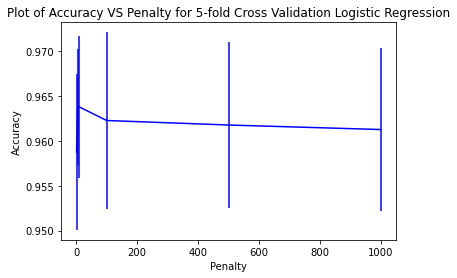

In [9]:
penalty_parameters = [1, 5, 10, 100, 500, 1000]
poly_degree = 2
accuracy_penalty, standard_deviation_penalty = calculate_accuracy_stddev_for_penalty_ranges(penalty_parameters, poly_degree)

plot.figure()
plot.errorbar(penalty_parameters, accuracy_penalty, yerr = standard_deviation_penalty, color = 'blue')
plot.xlabel('Penalty')
plot.ylabel('Accuracy')
plot.title('Plot of Accuracy VS Penalty for 5-fold Cross Validation Logistic Regression')
plot.show()

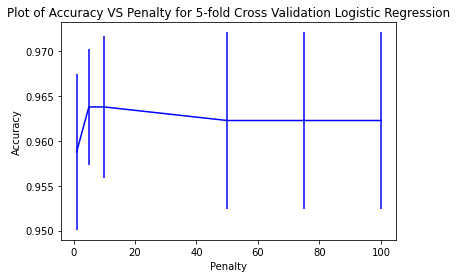

In [10]:
penalty_parameters = [1, 5, 10, 50, 75, 100]
poly_degree = 2
accuracy_penalty, standard_deviation_penalty = calculate_accuracy_stddev_for_penalty_ranges(penalty_parameters, poly_degree)

plot.figure()
plot.errorbar(penalty_parameters, accuracy_penalty, yerr = standard_deviation_penalty, color = 'blue')
plot.xlabel('Penalty')
plot.ylabel('Accuracy')
plot.title('Plot of Accuracy VS Penalty for 5-fold Cross Validation Logistic Regression')
plot.show()

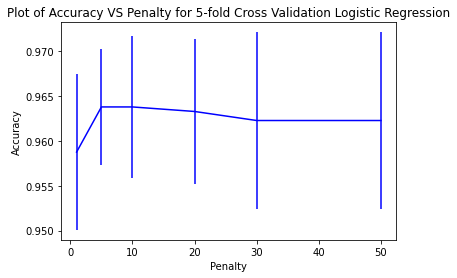

In [11]:
penalty_parameters = [1, 5, 10, 20, 30, 50]
poly_degree = 2
accuracy_penalty, standard_deviation_penalty = calculate_accuracy_stddev_for_penalty_ranges(penalty_parameters, poly_degree)

plot.figure()
plot.errorbar(penalty_parameters, accuracy_penalty, yerr = standard_deviation_penalty, color = 'blue')
plot.xlabel('Penalty')
plot.ylabel('Accuracy')
plot.title('Plot of Accuracy VS Penalty for 5-fold Cross Validation Logistic Regression')
plot.show()

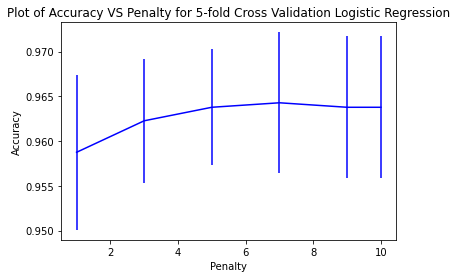

In [12]:
penalty_parameters = [1, 3, 5, 7, 9, 10]
poly_degree = 2
accuracy_penalty, standard_deviation_penalty = calculate_accuracy_stddev_for_penalty_ranges(penalty_parameters, poly_degree)

plot.figure()
plot.errorbar(penalty_parameters, accuracy_penalty, yerr = standard_deviation_penalty, color = 'blue')
plot.xlabel('Penalty')
plot.ylabel('Accuracy')
plot.title('Plot of Accuracy VS Penalty for 5-fold Cross Validation Logistic Regression')
plot.show()

## Using 5-Fold Cross Validation to select optimal K Neighbours for KNN

Function that takes range of K as input and use 5-fold cross validation and returns mean accuracy and standard deviation for KNN. This method is used to find optimal K for KNN

In [13]:
def calculate_accuracy_stddev_for_K_ranges(K_range) : 
    
    k_fold_split = 5

    k_fold_split_function =  KFold(n_splits = k_fold_split)

    accuracy_k = []
    standard_deviation_k = []

    for k in K_range : 
        
        KNN_Model = KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
        accuaracy_fold = []
        for train_data_index, test_data_index in k_fold_split_function.split(x):
            KNN_Model.fit(x[train_data_index], y[train_data_index])
            predictions = KNN_Model.predict(x[test_data_index])
            accuaracy_fold.append(accuracy_score(y[test_data_index], predictions))
            
        accuracy_k.append(np.array(accuaracy_fold).mean())
        standard_deviation_k.append(np.array(accuaracy_fold).std())
        
    return accuracy_k, standard_deviation_k

Evaluating optimal value of K by plotting Accuracy plots for range of K

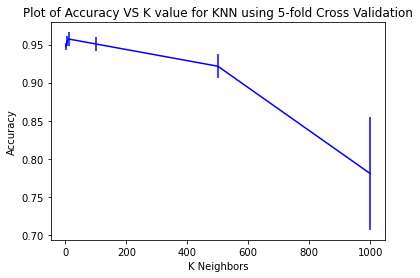

In [14]:
K_range = [1, 5, 10, 100, 500, 1000]
accuracy_k, standard_deviation_k = calculate_accuracy_stddev_for_K_ranges(K_range)

plot.figure()
plot.errorbar(K_range, accuracy_k, yerr = standard_deviation_k, color = 'blue')
plot.xlabel('K Neighbors')
plot.ylabel('Accuracy')
plot.title('Plot of Accuracy VS K value for KNN using 5-fold Cross Validation')
plot.show()

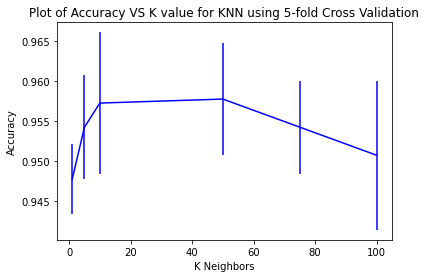

In [15]:
K_range = [1, 5, 10, 50, 75, 100]
accuracy_k, standard_deviation_k = calculate_accuracy_stddev_for_K_ranges(K_range)

plot.figure()
plot.errorbar(K_range, accuracy_k, yerr = standard_deviation_k, color = 'blue')
plot.xlabel('K Neighbors')
plot.ylabel('Accuracy')
plot.title('Plot of Accuracy VS K value for KNN using 5-fold Cross Validation')
plot.show()

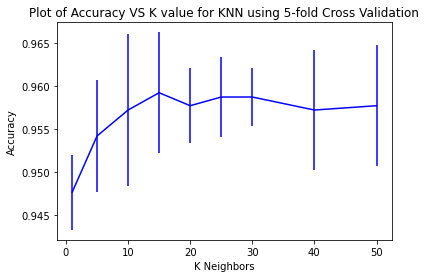

In [16]:
K_range = [1, 5, 10, 15, 20, 25, 30, 40, 50]
accuracy_k, standard_deviation_k = calculate_accuracy_stddev_for_K_ranges(K_range)

plot.figure()
plot.errorbar(K_range, accuracy_k, yerr = standard_deviation_k, color = 'blue')
plot.xlabel('K Neighbors')
plot.ylabel('Accuracy')
plot.title('Plot of Accuracy VS K value for KNN using 5-fold Cross Validation')
plot.show()

Evaluating if adding POlynomial Degree to data will improve KNN's performance

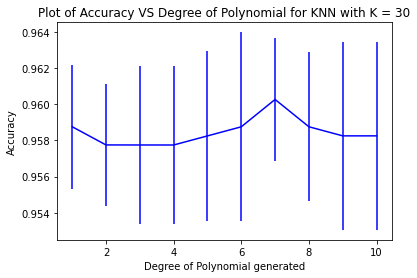

In [17]:
k_optimised = 30
poly_degree_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

k_fold_split = 5

k_fold_split_function =  KFold(n_splits = k_fold_split)

accuracy_poly_degree = []
standard_deviation_poly_degree = []
KNN_Model = KNeighborsClassifier(n_neighbors = k_optimised, weights = 'uniform')
        
for poly_degree in poly_degree_range : 
    poly_features_function = PolynomialFeatures(poly_degree)
    x_poly_features  = poly_features_function.fit_transform(x)
    accuaracy_fold = []
    for train_data_index, test_data_index in k_fold_split_function.split(x_poly_features):
        KNN_Model.fit(x_poly_features[train_data_index], y[train_data_index])
        predictions = KNN_Model.predict(x_poly_features[test_data_index])
        accuaracy_fold.append(accuracy_score(y[test_data_index], predictions))

    accuracy_poly_degree.append(np.array(accuaracy_fold).mean())
    standard_deviation_poly_degree.append(np.array(accuaracy_fold).std())

plot.figure()
plot.errorbar(poly_degree_range, accuracy_poly_degree, yerr = standard_deviation_poly_degree, color = 'blue')
plot.xlabel('Degree of Polynomial generated')
plot.ylabel('Accuracy')
plot.title('Plot of Accuracy VS Degree of Polynomial for KNN with K = 30')
plot.show()

## Generating train and test data set to analyse both models based on above hyper parameter tuning results

Using Random Seed and Splitting data in train and test data in 80:20 ratio

In [18]:
random.seed(123)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

## Final Logistic Regression Model based on hyper parameter optimisation

,Intercept,1,x1,x2,x1^2,x1 x2,x2^2
0,[0.196],[-0.0],[-0.051],[-11.978],[-12.607],[0.061],[0.836]


,Model Equation
0,(-0.051) * x1 + (-11.978) * x2 + (-12.607) * x1^2 + (0.061) * x1 x2 + (0.836) * x2^2 + (0.196)


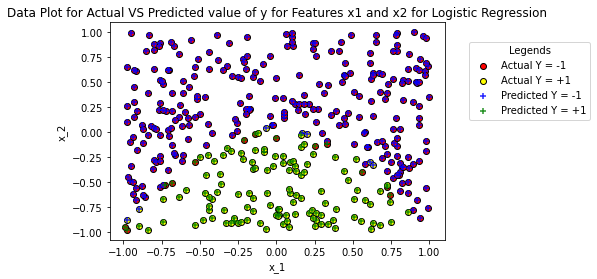

In [19]:
penalty_parameter = 5
poly_degree = 2

poly_features_function = PolynomialFeatures(poly_degree)
x_train_poly_features  = poly_features_function.fit_transform(x_train)
x_test_poly_features  = poly_features_function.fit_transform(x_test)

temp_df = pd.DataFrame(x, columns = ['x1', 'x2'])
feature_names = poly_features_function.get_feature_names(temp_df.columns)
feature_names.insert(0, 'Intercept')

Logistic_Regression_Model_Final = LogisticRegression(penalty = 'l2', C = penalty_parameter, max_iter = 10000)
Logistic_Regression_Model_Final.fit(x_train_poly_features, y_train)


logistic_regression_params_df = pd.DataFrame(columns = feature_names)
model_dict = {}
model_dict['Intercept'] = [np.around(Logistic_Regression_Model_Final.intercept_[0], decimals = 3)]
for i in range(1, 7) :
    model_dict[feature_names[i]] = [np.around(Logistic_Regression_Model_Final.coef_[0][i-1], decimals = 3)]

logistic_regression_params_df = logistic_regression_params_df.append(model_dict, ignore_index = True)
logistic_regression_params_df = logistic_regression_params_df.style.applymap(lambda x:'white-space:nowrap')
display(logistic_regression_params_df)


logistic_regression_model_equation_df = pd.DataFrame(columns = ['Model Equation'])
model_eq_dict = {}
equation_string = ''
for i in range(1, 7) :
    coeff = np.around(Logistic_Regression_Model_Final.coef_[0][i-1], decimals = 3)
    if coeff != 0 : 
        equation_string += '(' + str(coeff) + ')' + ' * ' + feature_names[i] + ' + '

equation_string += '(' + str(np.around(Logistic_Regression_Model_Final.intercept_[0], decimals = 3)) + ')'
model_eq_dict['Model Equation'] = equation_string

logistic_regression_model_equation_df = logistic_regression_model_equation_df.append(model_eq_dict, ignore_index = True)
logistic_regression_model_equation_df = logistic_regression_model_equation_df.style.set_properties(**{'text-align': 'left'})
logistic_regression_model_equation_df = logistic_regression_model_equation_df.applymap(lambda x:'white-space:nowrap')
display(logistic_regression_model_equation_df)


LR_Predictions = Logistic_Regression_Model_Final.predict(x_test_poly_features)

test_temp_df = pd.DataFrame(x_test, columns = ['x1','x2'])
x1_test = test_temp_df[['x1']]
x2_test = test_temp_df[['x2']]


plot.scatter(x1_test[np.array(y_test) == -1], x2_test[np.array(y_test) == -1], color='red', marker="o", edgecolors="black")
plot.scatter(x1_test[np.array(y_test) == 1], x2_test[np.array(y_test) == 1], color='yellow', marker="o", edgecolors="black")
plot.scatter(x1_test[LR_Predictions == -1], x2_test[LR_Predictions == -1], color='blue', marker="+", alpha=0.85)
plot.scatter(x1_test[LR_Predictions == 1], x2_test[LR_Predictions == 1], color='green', marker="+", alpha=0.85)
plot.title('Data Plot for Actual VS Predicted value of y for Features x1 and x2 for Logistic Regression')
plot.xlabel("x_1")
plot.ylabel("x_2")
plot.legend(['Actual Y = -1', 'Actual Y = +1', 'Predicted Y = -1', 'Predicted Y = +1'], title="Legends", loc = 'lower right', bbox_to_anchor=(1.45, 0.53))
plot.show()



## Final KNN Model based on above hyper parameter optimisation

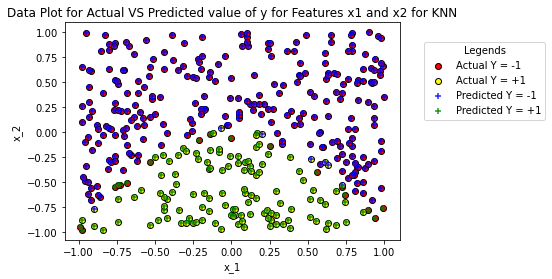

In [20]:
k_optimised = 30

KNN_Model_Final = KNeighborsClassifier(n_neighbors = k_optimised, weights = 'uniform')
 
KNN_Model_Final.fit(x_train, y_train)
KNN_predictions = KNN_Model_Final.predict(x_test)

test_temp_df = pd.DataFrame(x_test, columns = ['x1','x2'])
x1_test = test_temp_df[['x1']]
x2_test = test_temp_df[['x2']]


plot.scatter(x1_test[np.array(y_test) == -1], x2_test[np.array(y_test) == -1], color='red', marker="o", edgecolors="black")
plot.scatter(x1_test[np.array(y_test) == 1], x2_test[np.array(y_test) == 1], color='yellow', marker="o", edgecolors="black")
plot.scatter(x1_test[KNN_predictions == -1], x2_test[KNN_predictions == -1], color='blue', marker="+", alpha=0.85)
plot.scatter(x1_test[KNN_predictions == 1], x2_test[KNN_predictions == 1], color='green', marker="+", alpha=0.85)
plot.title('Data Plot for Actual VS Predicted value of y for Features x1 and x2 for KNN')
plot.xlabel("x_1")
plot.ylabel("x_2")
plot.legend(['Actual Y = -1', 'Actual Y = +1', 'Predicted Y = -1', 'Predicted Y = +1'], title="Legends", loc = 'lower right', bbox_to_anchor=(1.45, 0.53))
plot.show()


## Model Performance

In [21]:
y_test_postive = np.count_nonzero(y_test == 1)
y_test_negative = np.count_nonzero(y_test == -1)

actual_test_df = pd.DataFrame({"Test Data Actual Positive":[y_test_postive], "Test Data Actual Negative":[y_test_negative]})
display(actual_test_df)

,Test Data Actual Positive,Test Data Actual Negative
0,121,277


Evaluating Model Peformance for Logistic Regression

In [22]:
LR_true_positive = 0
LR_true_negative = 0
LR_false_positive = 0
LR_false_negative = 0
for i in range(len(y_test)) : 
    if np.array(y_test)[i] == 1 and LR_Predictions[i] == 1 : 
        LR_true_positive += 1
    elif np.array(y_test)[i] == -1 and LR_Predictions[i] == -1 :
        LR_true_negative += 1
    elif np.array(y_test)[i] == 1 and LR_Predictions[i] == -1 :
        LR_false_negative += 1
    elif np.array(y_test)[i] == -1 and LR_Predictions[i] == 1 :
        LR_false_positive += 1

LR_Accuracy = ((LR_true_positive + LR_true_negative) / (LR_true_positive + LR_true_negative + LR_false_positive + LR_false_negative)) * 100

LR_True_Positive_Rate = (LR_true_positive) / (LR_true_positive + LR_false_negative)
LR_False_Positive_Rate = (LR_false_positive) / (LR_false_positive + LR_true_negative)
LR_Precision = (LR_true_positive) / (LR_true_positive + LR_false_positive)

LR_actual_predicted_df = pd.DataFrame({"True Positive":[LR_true_positive], "True Negative":[LR_true_negative], "False Positive":[LR_false_positive], "False Negative":[LR_false_negative], "Accuracy":[LR_Accuracy], "True Positive Rate":[LR_True_Positive_Rate], "False Positive Rate":[LR_False_Positive_Rate], "Precision":[LR_Precision]})
display(LR_actual_predicted_df)



,True Positive,True Negative,False Positive,False Negative,Accuracy,True Positive Rate,False Positive Rate,Precision
0,114,264,13,7,94.974874,0.942149,0.046931,0.897638


Evaluating Model Peformance for KNN

In [23]:
KNN_true_positive = 0
KNN_true_negative = 0
KNN_false_positive = 0
KNN_false_negative = 0
for i in range(len(y_test)) : 
    if np.array(y_test)[i] == 1 and KNN_predictions[i] == 1 : 
        KNN_true_positive += 1
    elif np.array(y_test)[i] == -1 and KNN_predictions[i] == -1 :
        KNN_true_negative += 1
    elif np.array(y_test)[i] == 1 and KNN_predictions[i] == -1 :
        KNN_false_negative += 1
    elif np.array(y_test)[i] == -1 and KNN_predictions[i] == 1 :
        KNN_false_positive += 1

KNN_Accuracy = ((KNN_true_positive + KNN_true_negative) / (KNN_true_positive + KNN_true_negative + KNN_false_positive + KNN_false_negative)) * 100

KNN_y_pos_1_correctly_predicted = (KNN_true_positive/y_test_postive)*100

KNN_y_neg_1_correctly_predicted = (KNN_true_negative/y_test_negative)*100

KNN_True_Positive_Rate = (KNN_true_positive) / (KNN_true_positive + KNN_false_negative)
KNN_False_Positive_Rate = (KNN_false_positive) / (KNN_false_positive + KNN_true_negative)
KNN_Precision = (KNN_true_positive) / (KNN_true_positive + KNN_false_positive)

KNN_actual_predicted_df = pd.DataFrame({"True Positive":[KNN_true_positive], "True Negative":[KNN_true_negative], "False Positive":[KNN_false_positive], "False Negative":[KNN_false_negative], "Accuracy":[KNN_Accuracy], "True Positive Rate":[KNN_True_Positive_Rate], "False Positive Rate":[KNN_False_Positive_Rate], "Precision":[KNN_Precision]})
display(KNN_actual_predicted_df)

,True Positive,True Negative,False Positive,False Negative,Accuracy,True Positive Rate,False Positive Rate,Precision
0,114,260,17,7,93.969849,0.942149,0.061372,0.870229


## Confusion Matrix

Evaluating Confusion Matrix for Logistic Regression

In [27]:
LR_Confusion_Matrix = confusion_matrix(y_test, LR_Predictions)
LR_Confusion_Matrix_df = pd.DataFrame(LR_Confusion_Matrix, index = ['True Negative', 'True Positive'], columns = ['Predicted Negative', 'Predicted Postive'])
display(LR_Confusion_Matrix_df)

,Predicted Negative,Predicted Postive
True Negative,264,13
True Positive,7,114


Evaluating Confusion Matrix for KNN

In [28]:
KNN_Confusion_Matrix = confusion_matrix(y_test, KNN_predictions)
KNN_Confusion_Matrix_df = pd.DataFrame(KNN_Confusion_Matrix, index = ['True Negative', 'True Positive'], columns = ['Predicted Negative', 'Predicted Positive'])
display(KNN_Confusion_Matrix_df)

,Predicted Negative,Predicted Positive
True Negative,260,17
True Positive,7,114


Generating Most Frequent Baseline Classifier and evaluating Confusion Matrix

In [37]:
Most_Frequent_Dummy_Model = DummyClassifier(strategy = "most_frequent")
Most_Frequent_Dummy_Model.fit(x_train, y_train)

Most_Frequent_Dummy_Predictions = Most_Frequent_Dummy_Model.predict(x_test)

Most_Frequent_Dummy_Confusion_Matrix = confusion_matrix(y_test, Most_Frequent_Dummy_Predictions)
Most_Frequent_Dummy_Confusion_Matrix_df = pd.DataFrame(Most_Frequent_Dummy_Confusion_Matrix, index = ['True Negative', 'True Positive'], columns = ['Predicted Negative', 'Predicted Positive'])
display(Most_Frequent_Dummy_Confusion_Matrix_df)

,Predicted Negative,Predicted Positive
True Negative,277,0
True Positive,121,0


Generating Random Baseline Classifier and evaluating Confusion Matrix

In [38]:
Random_Dummy_Model = DummyClassifier(strategy = "uniform")
Random_Dummy_Model.fit(x_train, y_train)

Random_Dummy_Predictions = Random_Dummy_Model.predict(x_test)

Random_Dummy_Confusion_Matrix = confusion_matrix(y_test, Random_Dummy_Predictions)
Random_Dummy_Confusion_Matrix_df = pd.DataFrame(Random_Dummy_Confusion_Matrix, index = ['True Negative', 'True Positive'], columns = ['Predicted Negative', 'Predicted Positive'])
display(Random_Dummy_Confusion_Matrix_df)

,Predicted Negative,Predicted Positive
True Negative,132,145
True Positive,64,57


## ROC Curve

In [39]:
Logistic_Regression_Score = Logistic_Regression_Model_Final.decision_function(x_test_poly_features)
LR_FPR, LR_TPR, LR_Threshold = roc_curve(y_test, Logistic_Regression_Score)


In [40]:
KNN_Score = KNN_Model_Final.predict_proba(x_test)
KNN_FPR, KNN_TPR, KNN_Threshold = roc_curve(y_test, KNN_Score[:,1])


In [41]:
Most_Frequent_Score = Most_Frequent_Dummy_Model.predict_proba(x_test)
MF_FPR, MF_TPR, MF_Threshold = roc_curve(y_test, Most_Frequent_Score[:,1])


In [42]:
Random_Dummy_Score = Random_Dummy_Model.predict_proba(x_test)
RD_FPR, RD_TPR, RD_Threshold = roc_curve(y_test, Random_Dummy_Score[:,1])


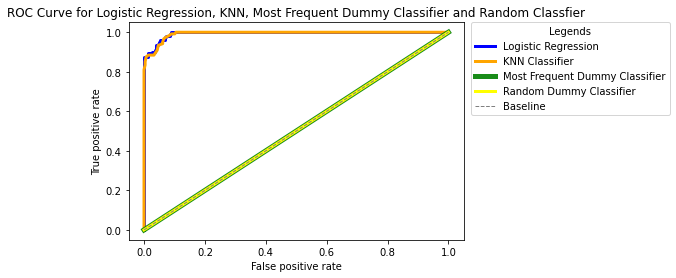

In [43]:
plot.figure()

plot.plot(LR_FPR, LR_TPR, label = 'Logistic Regression', color = 'blue', linewidth=3)
plot.plot(KNN_FPR, KNN_TPR, label = 'KNN Classifier', color = 'orange', linewidth=3)
plot.plot(MF_FPR, MF_TPR, label = 'Most Frequent Dummy Classifier', color = 'green', alpha = 0.9, linewidth=5)
plot.plot(RD_FPR, RD_TPR, label = 'Random Dummy Classifier', color = 'yellow', linewidth=3)
plot.plot([0, 1], [0, 1], color='grey', linestyle='--', linewidth=1)
plot.ylabel("True positive rate")
plot.xlabel("False positive rate")
plot.title('ROC Curve for Logistic Regression, KNN, Most Frequent Dummy Classifier and Random Classfier')
plot.legend(['Logistic Regression', 'KNN Classifier', 'Most Frequent Dummy Classifier', 'Random Dummy Classifier', 'Baseline'], title="Legends", loc = 'lower right', bbox_to_anchor=(1.63, 0.55))
plot.show()